In [170]:
p = 'xiaomeng_v3.5.eval.1k.base10k.pkl'
from etils import epath

p = epath.Path(p)
xiaomeng_base_losses = []
cont = 0
with p.open('rb') as f:
    try:
        while 1:
            xiaomeng_base_loss = pickle.load(f)
            xiaomeng_base_losses.append(xiaomeng_base_loss)
            cont += 1
            # print(cont)
    except:
        pass

p = 'xiaomeng_v3.5.eval.1k.base500k.pkl'
from etils import epath

p = epath.Path(p)
xiaomeng_base500k_losses = []
cont = 0
with p.open('rb') as f:
    try:
        while 1:
            xiaomeng_base_loss = pickle.load(f)
            xiaomeng_base500k_losses.append(xiaomeng_base_loss)
            cont += 1
            # print(cont)
    except:
        pass

p = 'llama2-7b.long.eval.1k.pkl'
from etils import epath

p = epath.Path(p)
llama_base10k_losses = []
cont = 0
with p.open('rb') as f:
    try:
        while 1:
            loss = pickle.load(f)
            llama_base10k_losses.append(loss)
            cont += 1
            # print(cont)
    except:
        pass

p1 = 'llama2-7b.long.eval.1k.base500k.a.pkl'
p2 = 'llama2-7b.long.eval.1k.base500k.b.pkl'

from etils import epath

p1 = epath.Path(p1)
p2 = epath.Path(p2)

llama_base500k_losses = []
cont = 0
with p1.open('rb') as f1, p2.open('rb') as f2:
    try:
        while 1:
            loss1 = pickle.load(f1)
            loss2 = pickle.load(f2)
            
            llama_base500k_losses.append(loss1)
            llama_base500k_losses.append(loss2)
            cont += 1
            # print(cont)
    except:
        pass


In [284]:
p = 'xiaomeng_v3.5_step448800.eval.1k.base500k.pkl'
from etils import epath

p = epath.Path(p)
xm_long_base500k_losses = []
cont = 0
with p.open('rb') as f:
    try:
        while 1:
            loss = pickle.load(f)
            xm_long_base500k_losses.append(loss)
            cont += 1
            # print(cont)
    except:
        pass
        
p = 'xiaomeng_v3.5_step448800.eval.1k.base10k.pkl'

from etils import epath

p = epath.Path(p)
xm_long_base10k_losses = []
cont = 0
with p.open('rb') as f:
    try:
        while 1:
            loss = pickle.load(f)
            xm_long_base10k_losses.append(loss)
            cont += 1
            # print(cont)
    except:
        pass

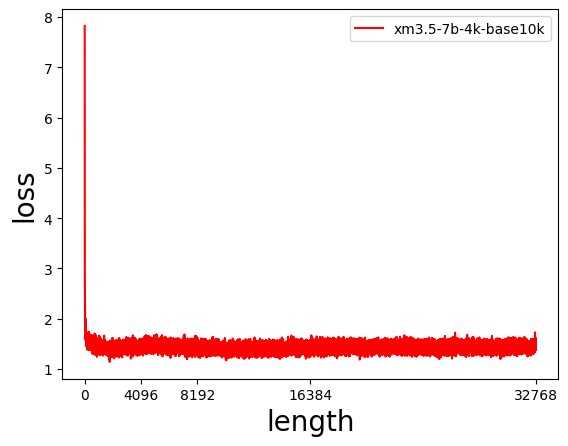

In [285]:
xiaomeng_total_loss = np.concatenate([l['loss'] for l in xm_long_base10k_losses], axis=0)
xm_long_mean_loss_10k = xiaomeng_total_loss.mean(0)
plt.plot(xm_long_mean_loss_10k.tolist(), 'red')
plt.legend(['xm3.5-7b-4k-base10k', 'xm3.5-7b-4k-base500k'])
plt.ylabel('loss', fontsize=20)
plt.xlabel('length', fontsize=20)
# plt.xticks(range(len(x_labels)), x_labels)
plt.xticks([0, 4096, 8192, 16384, 32768])

plt.show()

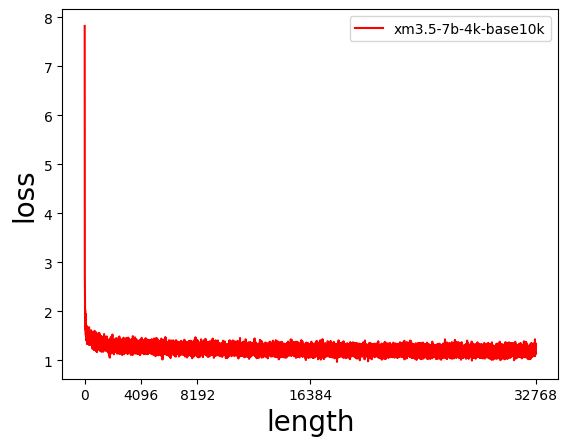

In [254]:
xiaomeng_total_loss = np.concatenate([l['loss'] for l in xm_long_base500k_losses], axis=0)
xm_long_mean_loss_500k = xiaomeng_total_loss.mean(0)
plt.plot(xm_long_mean_loss_500k.tolist(), 'red')
plt.legend(['xm3.5-7b-4k-base10k', 'xm3.5-7b-4k-base500k'])
plt.ylabel('loss', fontsize=20)
plt.xlabel('length', fontsize=20)
plt.xticks([0, 4096, 8192, 16384, 32768])

plt.show()

In [253]:
len(xm_long_base500k_losses)

124

In [200]:
llama_base500k_losses[0]['loss'].shape

torch.Size([18719])

In [182]:
loss1['loss'].shape

torch.Size([18898])

In [172]:
len(llama_base10k_losses)

1001

In [186]:
xiaomeng_mean_loss

nan

In [203]:
for l in llama_base500k_losses:
    print(l['loss'].shape)

torch.Size([18719])
torch.Size([18719])
torch.Size([18752])
torch.Size([18752])
torch.Size([18751])
torch.Size([18751])
torch.Size([18867])
torch.Size([18867])
torch.Size([18898])
torch.Size([18898])
torch.Size([18719])
torch.Size([18719])
torch.Size([18752])
torch.Size([18752])
torch.Size([18751])
torch.Size([18751])
torch.Size([18867])
torch.Size([18867])
torch.Size([18898])
torch.Size([18898])
torch.Size([18719])
torch.Size([18719])
torch.Size([18752])
torch.Size([18752])
torch.Size([18751])
torch.Size([18751])
torch.Size([18867])
torch.Size([18867])
torch.Size([18898])
torch.Size([18898])
torch.Size([18719])
torch.Size([18719])
torch.Size([18752])
torch.Size([18752])
torch.Size([18751])
torch.Size([18751])
torch.Size([18867])
torch.Size([18867])
torch.Size([18898])
torch.Size([18898])
torch.Size([18719])
torch.Size([18719])
torch.Size([18752])
torch.Size([18752])
torch.Size([18751])
torch.Size([18751])
torch.Size([18867])
torch.Size([18867])
torch.Size([18898])
torch.Size([18898])


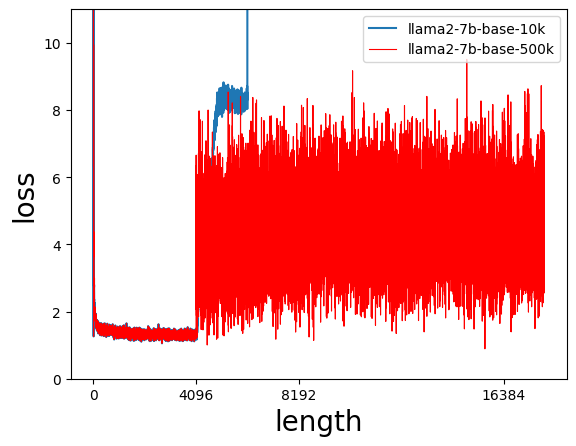

In [251]:
import torch
offset = 9000
xiaomeng_total_loss = torch.cat([l['loss'][:offset].reshape(1, -1) for l in llama_base10k_losses if len(l['loss']) >= offset], axis=0)
xiaomeng_mean_loss = xiaomeng_total_loss.mean(0)
xiaomeng_mean_loss[xiaomeng_mean_loss.isnan()] = 12

# xiaomeng_mean_loss = torch.cat([xiaomeng_mean_loss, torch.tensor([12] * 9000)])
plt.plot(xiaomeng_mean_loss.tolist(), lw=1.5)
offset = 9000 * 2
xiaomeng_total_loss = torch.cat([l['loss'][:offset].reshape(1, -1) for l in llama_base500k_losses if len(l['loss']) >= offset], axis=0)
xiaomeng_mean_loss_500k = xiaomeng_total_loss.mean(0)
xiaomeng_mean_loss_500k[:4096] = xiaomeng_mean_loss[:4096]
plt.plot(xiaomeng_mean_loss_500k.tolist(), 'red', lw=0.8)
plt.legend(['llama2-7b-base-10k', 'llama2-7b-base-500k'], loc='upper right')
plt.ylim(0, 11)
plt.ylabel('loss', fontsize=20)
plt.xlabel('length', fontsize=20)
plt.xticks([0, 4096, 8192, 16384])
plt.show()

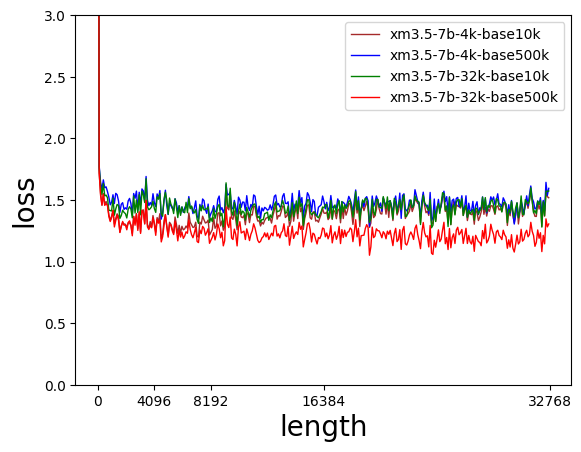

In [301]:
div = 100
x = range(0, 32768, div)
xiaomeng_total_loss = np.concatenate([l['loss'] for l in xiaomeng_base_losses], axis=0)
xiaomeng_mean_loss = xiaomeng_total_loss.mean(0)
xiaomeng_mean_loss = [l for i, l in enumerate(xiaomeng_mean_loss) if i % div == 0]
plt.plot(x, xiaomeng_mean_loss, 'brown', lw=1)

xiaomeng_total_loss = np.concatenate([l['loss'] for l in xiaomeng_base500k_losses], axis=0)
xiaomeng_mean_loss_500k = xiaomeng_total_loss.mean(0)
xiaomeng_mean_loss_500k = [l for i, l in enumerate(xiaomeng_mean_loss_500k) if i % div == 0]
plt.plot(x, xiaomeng_mean_loss_500k, 'blue', lw=1)

xiaomeng_total_loss = np.concatenate([l['loss'] for l in xm_long_base10k_losses], axis=0)
xm_long_mean_loss_10k = xiaomeng_total_loss.mean(0)
xm_long_mean_loss_10k = [l for i, l in enumerate(xm_long_mean_loss_10k) if i % div == 0]
plt.plot(x, xm_long_mean_loss_10k, 'green', lw=1)


xiaomeng_total_loss = np.concatenate([l['loss'] for l in xm_long_base500k_losses], axis=0)
xm_long_mean_loss_500k = xiaomeng_total_loss.mean(0)
xm_long_mean_loss_500k = [l for i, l in enumerate(xm_long_mean_loss_500k) if i % div == 0]
plt.plot(x, xm_long_mean_loss_500k, 'red', lw=1)



plt.legend(['xm3.5-7b-4k-base10k', 'xm3.5-7b-4k-base500k', 'xm3.5-7b-32k-base10k','xm3.5-7b-32k-base500k',])
plt.ylabel('loss', fontsize=20)
plt.xlabel('length', fontsize=20)
plt.xticks([0, 4096, 8192, 16384, 32768])
plt.ylim(0, 3)
plt.show()

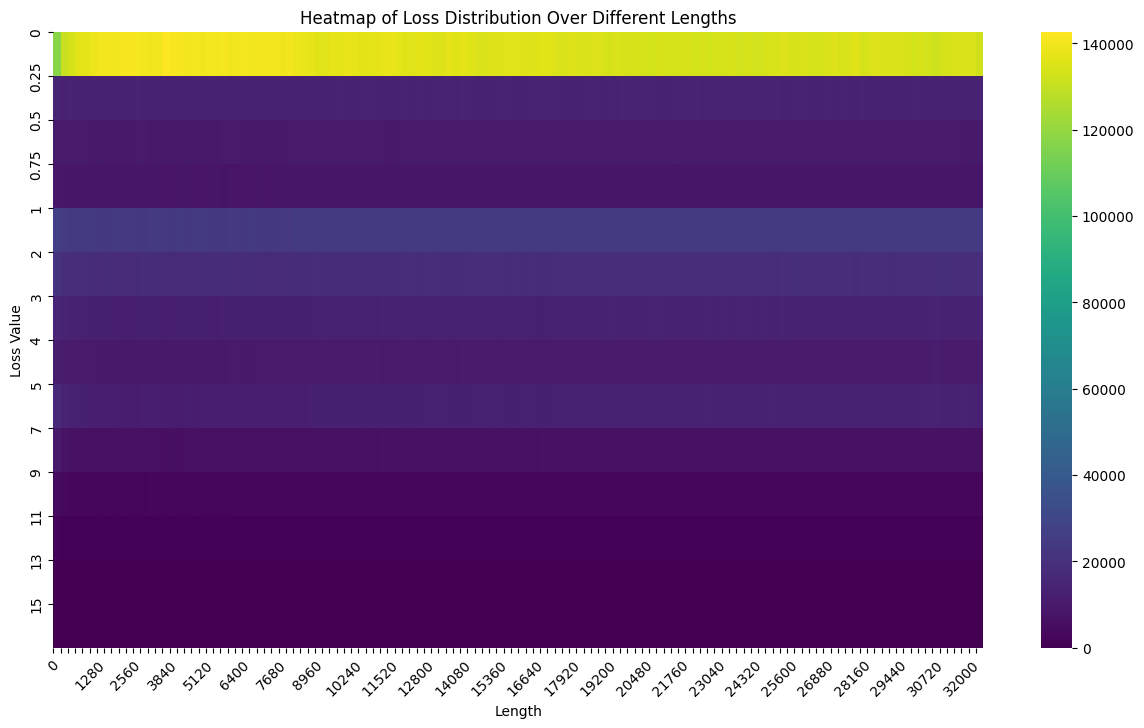

In [146]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 假设你有一个2D数组，其中每行表示不同的loss数据，长度为1000
length = 32768
loss_data = xiaomeng_total_loss
num_samples = len(loss_data)  # 这里假设你有100条loss数据

# 创建一个二维数组来统计特定长度和loss值的数量
loss_min, loss_max = 0, 16  # 假设loss值在[-3, 3]之间

# 定义loss的级别区
loss_levels = [0, 0.25, 0.5, 0.75, 1, 2,  3,  4, 5, 7,  9,  11,  13,  15]
level_bins = len(loss_levels) - 1

bins = len(loss_levels) # 你可以调整bins的数量
offset = 256
heatmap_data = np.zeros((bins, length // offset))

row = 0
# 计算每个长度和loss级别的数量
for j in range(0, length, offset):
    loss_val = loss_data[:, j: j + offset]
    last_num = 0
    for i, loss in enumerate(loss_levels[1:]):
        c = loss_val <= loss
        cur_num_ = c.sum()
        cur_num = cur_num_ - last_num
        last_num = cur_num_
        heatmap_data[i, row] = cur_num
    row += 1

print('=========')
# 绘制热力图
plt.figure(figsize=(15, 8))
ax = sns.heatmap(heatmap_data, cmap='viridis', xticklabels=100)

# 只在纵坐标上标注整数刻度
yticklabels = np.arange(loss_min, loss_max + 1)
ax.set_yticks(range(len(loss_levels)))
# ytags = [l for i, l in enumerate(yticklabels) if  l <= 0 or int(np.log2(l)) == np.log2(l)]
# ytags = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 16]
ax.set_yticklabels(loss_levels)

xtags = list(range(0, length, offset))
ax.set_xticks(range(len(xtags)))
xtags = [x if i % 5 == 0 else '' for i, x in enumerate(xtags)]
ax.set_xticklabels(xtags, rotation=45)

plt.xlabel('Length')
plt.ylabel('Loss Value')
plt.title('Heatmap of Loss Distribution Over Different Lengths')
plt.show()


In [131]:
x.sum()

131494

In [42]:
loss_data.max()

4.130995593306025

In [ ]:
import matplotlib.pyplot as plt

# 数据
xm3 = [8.06, 8.35, 8.59, 9.13, 10.21, 11.25]
xm3_5_7b = [10.35, 10.36, 10.44, 11.28, 14.38, 22.07]
xm3_5_7b_compiled_prefill = [10.33, 10.35, 10.36, 10.58, 10.92, 11.14]

# 自定义横坐标标签
x_labels = ['1', '256', '512', '1024', '2048', '3072']

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(xm3, label='xm3', marker='o')
plt.plot(xm3_5_7b, label='xm3.5-7b', marker='o')
plt.plot(xm3_5_7b_compiled_prefill, label='xm3.5-7b-prefill-compiled', marker='o')

# 添加自定义横坐标标签
plt.xticks(range(len(x_labels)), x_labels, fontsize=18)
plt.yticks(fontsize=18)

# 添加标签和标题
plt.xlabel('Prefill length', fontsize=20)
plt.ylabel('Time/s', fontsize=20)
# plt.title('Comparison of Different Datasets with Custom X Labels')
plt.legend(fontsize=17)

# 显示网格
# plt.grid(True)

# 显示图像
plt.show()


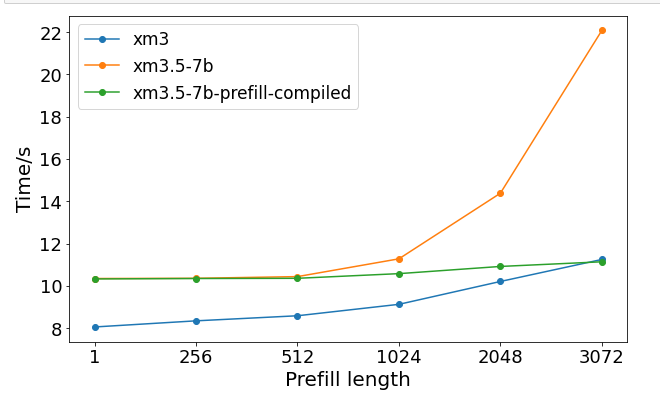